In [2]:
import time
from datetime import datetime
import vectorbt as vbt

import pandas as pd
import pandas_ta as ta
import numpy as np
import mplfinance as mpf

import matplotlib.pyplot as plt

### Average Directional Index (ADX)
![alt text](ADXfomula.png "ADX Fomula")

In [3]:
data = pd.read_csv('../MyStrategy/GBPUSD_1h.csv')
data.tail()

,timestamp,open,high,low,close,adj close,volumn
5011,2022-08-30 13:00:00+01:00,1.171921,1.172044,1.169098,1.170029,1.170029,0
5012,2022-08-30 14:00:00+01:00,1.169892,1.171921,1.169180,1.169905,1.169905,0
5013,2022-08-30 15:00:00+01:00,1.168484,1.168484,1.162372,1.162926,1.162926,0
5014,2022-08-30 16:00:00+01:00,1.163399,1.167174,1.163399,1.165189,1.165189,0
5015,2022-08-30 17:00:00+01:00,1.165365,1.166521,1.164985,1.165189,1.165189,0


In [4]:
df = data.copy()
df['timestamp'] = pd.to_datetime(df['timestamp'], utc=True).dt.tz_localize(None)
df.set_index('timestamp', inplace = True)
df

,open,high,low,close,adj close,volumn
timestamp,,,,,,
2021-11-04 17:00:00,1.349364,1.349437,1.348418,1.349273,1.349273,0
2021-11-04 18:00:00,1.349382,1.350366,1.349091,1.349655,1.349655,0
2021-11-04 19:00:00,1.349509,1.350475,1.349509,1.350238,1.350238,0
2021-11-04 20:00:00,1.350311,1.350457,1.349509,1.350020,1.350020,0
2021-11-04 21:00:00,1.349692,1.350202,1.348745,1.350074,1.350074,0
...,...,...,...,...,...,...
2022-08-30 12:00:00,1.171921,1.172044,1.169098,1.170029,1.170029,0
2022-08-30 13:00:00,1.169892,1.171921,1.169180,1.169905,1.169905,0
2022-08-30 14:00:00,1.168484,1.168484,1.162372,1.162926,1.162926,0


##### การใช้งาน
- บอกความแข็งแรงของแนวโน้ม
- ค่า +DI และ -DI ใช้วิเคราะห์หาทิศทางของเทรน 
- ADX > 25 หมายถึงเทรนแข็งแรง, ADX < 20 หมายถึงเทรนอ่อนแอ(อาจจะ Sideway)
- ช่วงไม่มีเทรนราคาอาจกำลังเปลี่ยนเทรนหรือมีความผันผวนสูง
- เส้น +DI ตัดขึ้นเหนือ -DI และ ADX > 25 หรือ 20 อาจเป็นสัญญาณเข้า Long
- เส้น -DI ตัดขึ้นเหนือ +DI และ ADX > 25 หรือ 20 อาจเป็นสัญญาณเข้า Short
- ใช้เป็นสัญญาณ Exit เช่น Long อยู่แล้วเส้น -DI ตัดขึ้น +DI
- การเกิด Divergence ของ ADX เป็นการแสดงถึงความเป็นแนวโน้มเริ่มอ่อนแรงลง
- สามารถประเมินโอกาสการ ผ่าน หรือ ไม่ผ่าน แนวรับ / แนวต้าน

##### ข้อจำกัด
- เส้น +DI, -DI ตัดกันอาจเกิดขึ้นบ่อยและบางครั้งเป็น False signal

อ้างอิงจาก 
* https://www.investopedia.com/terms/a/adx.asp
* https://thaibrokerforex.com/%E0%B9%80%E0%B8%97%E0%B8%84%E0%B8%99%E0%B8%B4%E0%B8%84%E0%B8%81%E0%B8%B2%E0%B8%A3%E0%B9%80%E0%B8%A5%E0%B9%88%E0%B8%99%E0%B8%94%E0%B9%89%E0%B8%A7%E0%B8%A2%E0%B8%AD%E0%B8%B4%E0%B8%99%E0%B8%94%E0%B8%B4/
* https://www.cwayinvestment.com/2012/06/average-directional-index-adx.html
* https://admiralmarkets.sc/th/education/articles/forex-indicators/adx-forex-indicator
* https://forexthai.in.th/adx-%E0%B8%84%E0%B8%B7%E0%B8%AD%E0%B8%AD%E0%B8%B0%E0%B9%84%E0%B8%A3/
* https://www.lucid-trader.com/average-directional-index-adx/

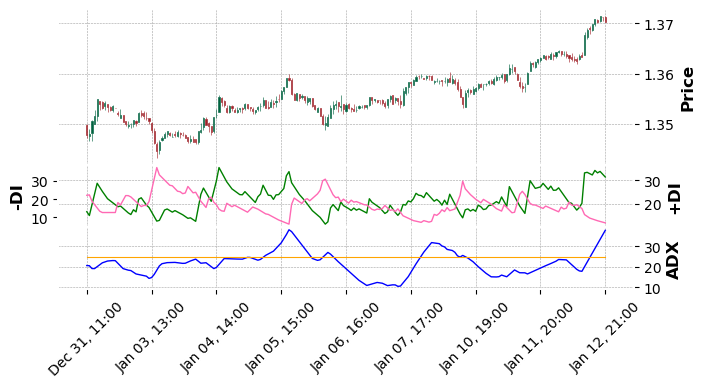

In [7]:
df.ta.adx(14, append=True)
start_date, end_date = '2021-12-31 10:45:00', '2022-01-12 21:45:00'

adx = df['ADX_14'].loc[start_date: end_date]
adxDMP= df['DMP_14'].loc[start_date: end_date]
adxDMN = df['DMN_14'].loc[start_date: end_date]

df_plot = df.loc[start_date: end_date]
adx_level = np.empty(df_plot.shape[0])
adx_level.fill(25)

adx_plot = mpf.make_addplot(adx, panel=2, color='blue', width=1, ylabel='ADX')
level_plot = mpf.make_addplot(adx_level, panel=2, color='orange', width=0.8)
adxDMP_plot = mpf.make_addplot(adxDMP, panel=1, color='green', width=1, ylabel='+DI')
adxDMN_plot = mpf.make_addplot(adxDMN, panel=1, color='hotpink', width=1, ylabel='-DI')

mpf.plot(df_plot, type='candle', style='charles',
         addplot=[adx_plot, level_plot, adxDMP_plot, adxDMN_plot],
         figsize=(8, 4))

##### ทดลองและสังเกตุว่าเหตุการณ์ใน ADX ส่งผลอะไรกับราคาสรุปออกมาเป็นสถิติ

ตัวอย่างผลที่เกิดขึ้น เช่น เกิด swing, แนวรับ, แนวต้าน, ราคาผันผวน, เปลี่ยนเทรน, sideway, เทรนไปต่อ, จุดสิ้นสุดเทรน

- [ ] +DI ตัดขึ้น -DI 
- [ ] -DI ตัดขึ้น +DI
- [ ] ADX > 25
- [ ] ADX < 20
- [ ] 20 < ADX < 25
- [ ] +DI ตัดขึ้น -DI และสังเกตุค่า ADX 
- [ ] -DI ตัดขึ้น +DI และสังเกตุค่า ADX
- [ ] ADX Divergence

In [59]:
df['prev_DMP'] = df['DMP_14'].shift(1)
df['prev_DMN'] = df['DMN_14'].shift(1)
df['DMP_cross'] = (df['prev_DMP'] < df['prev_DMN']) & (df['DMP_14'] > df['DMN_14']) 
df['DMN_cross'] = (df['prev_DMP'] > df['prev_DMN']) & (df['DMP_14'] < df['DMN_14'])

In [54]:
df[df['DMP_cross'] == True]

def adx_plot(df, start, end):

    df_plot = df.iloc[start: end]
    adx = df_plot['ADX_14']
    adxDMP= df_plot['DMP_14']
    adxDMN = df_plot['DMN_14']

    adx_level = np.empty(df_plot.shape[0])
    adx_level.fill(25)
    adx_level_below = np.empty(df_plot.shape[0])
    adx_level_below.fill(20)

    up_markers = []
    down_markers = []

    for index, row in df_plot.iterrows():
        dmp_cross = row['DMP_cross']
        dmn_cross = row['DMN_cross']
        if dmp_cross == True:
            up_markers.append(row['low'] * 0.998)
            down_markers.append(np.nan)
        elif dmn_cross == True:
            up_markers.append(np.nan)
            down_markers.append(row['high'] * 1.002)
        else:
            up_markers.append(np.nan)
            down_markers.append(np.nan)

    up_plot = mpf.make_addplot(up_markers, type='scatter', marker='^', markersize=10, panel=0, color='green')
    down_plot = mpf.make_addplot(down_markers, type='scatter', marker='v', markersize=10, panel=0, color='red')

    adx_plot = mpf.make_addplot(adx, panel=2, color='blue', width=1, ylabel='ADX')
    level_plot = mpf.make_addplot(adx_level, panel=2, color='orange', width=0.8)
    level_below_plot = mpf.make_addplot(adx_level_below, panel=2, color='orange', width=0.8)
    adxDMP_plot = mpf.make_addplot(adxDMP, panel=1, color='green', width=1, ylabel='+DI')
    adxDMN_plot = mpf.make_addplot(adxDMN, panel=1, color='hotpink', width=1, ylabel='-DI')

    return [adx_plot, level_plot, level_below_plot, adxDMP_plot, adxDMN_plot, up_plot, down_plot]

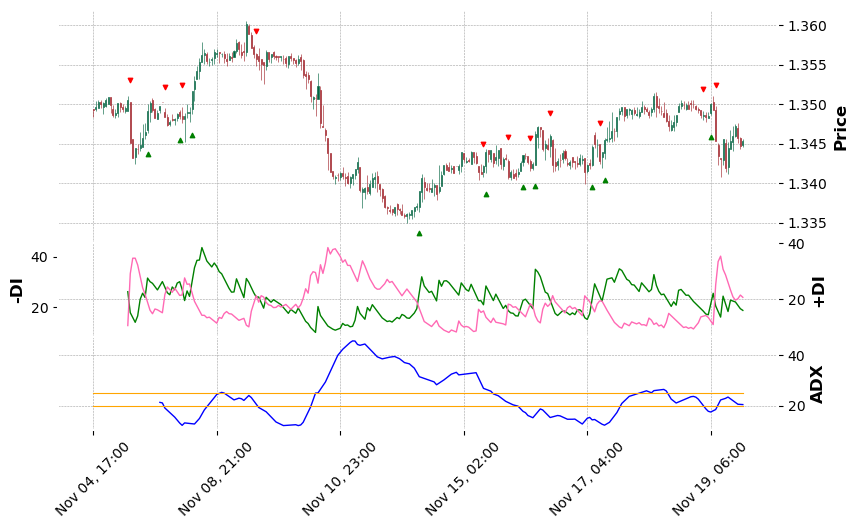

In [60]:
adx_info_plots = adx_plot(df, 0, 264)

mpf.plot(df.iloc[0:264], type='candle', style='charles',
         addplot=adx_info_plots,
         figsize=(10, 6))

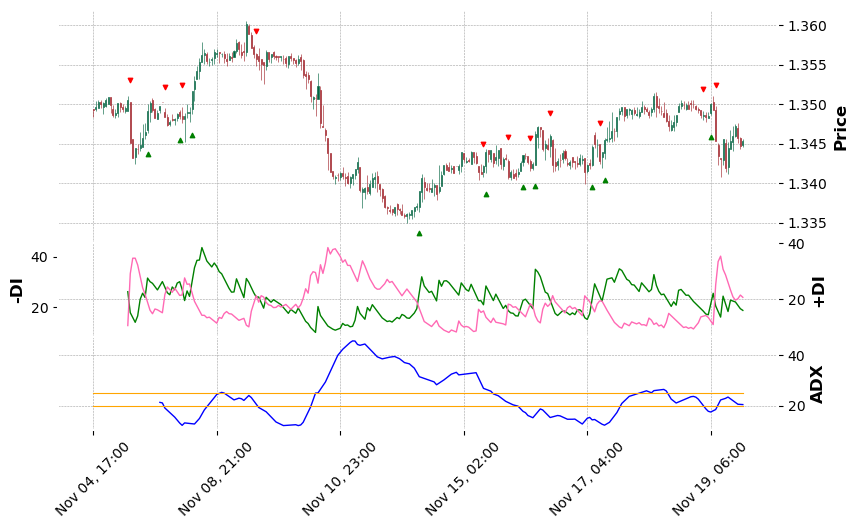

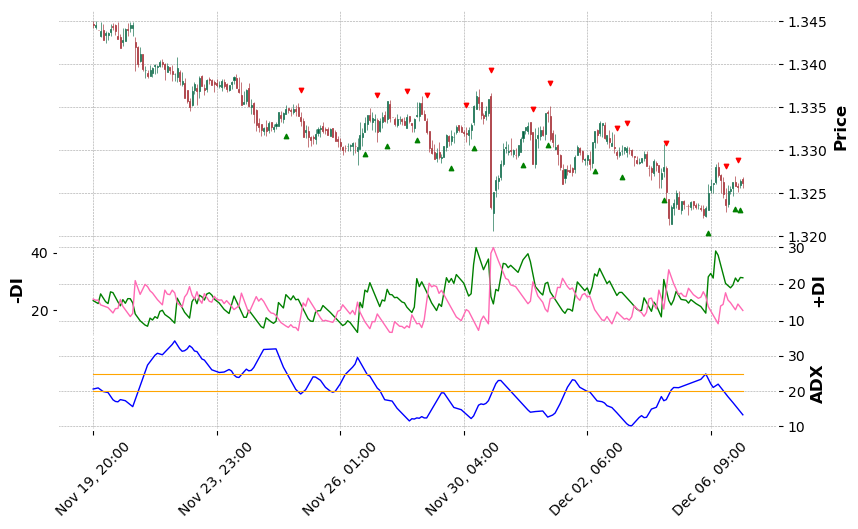

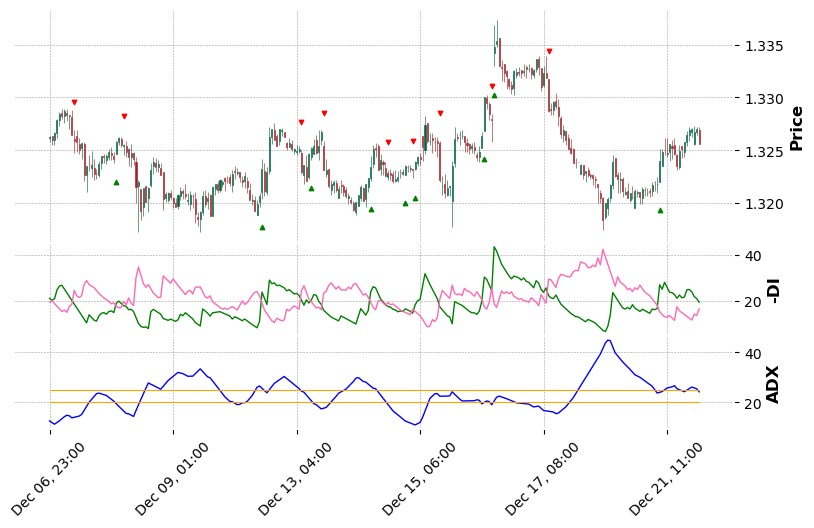

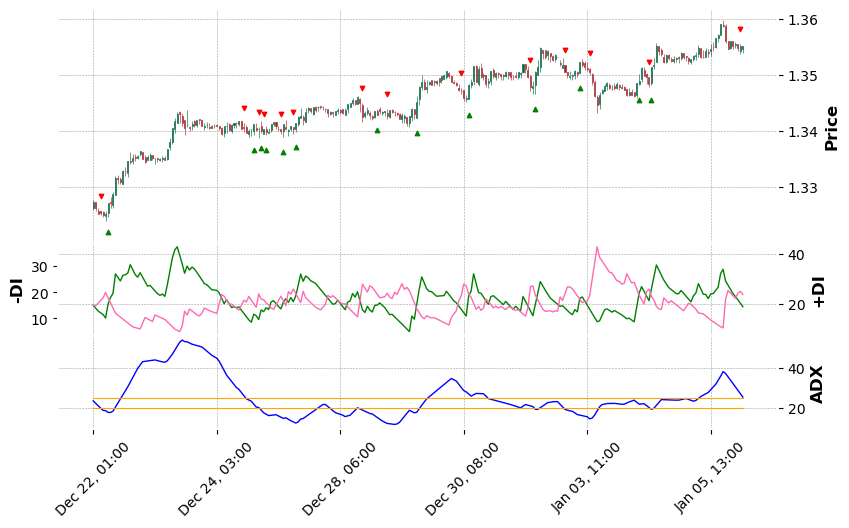

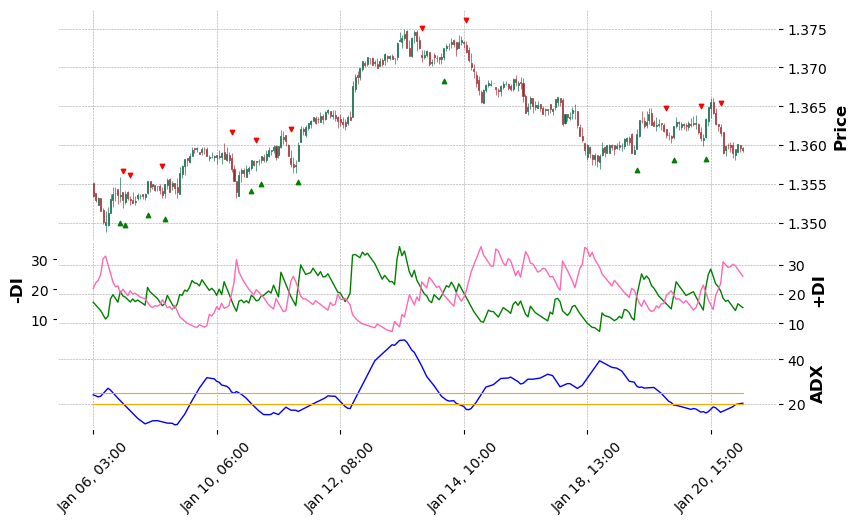

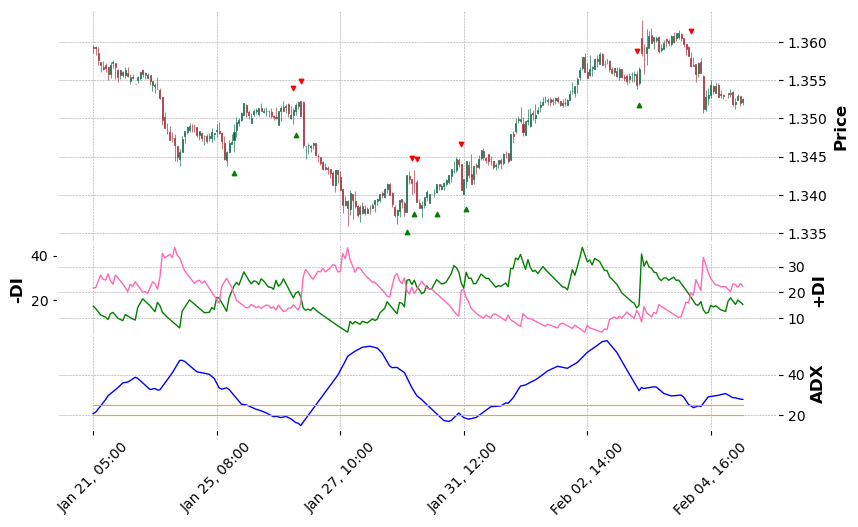

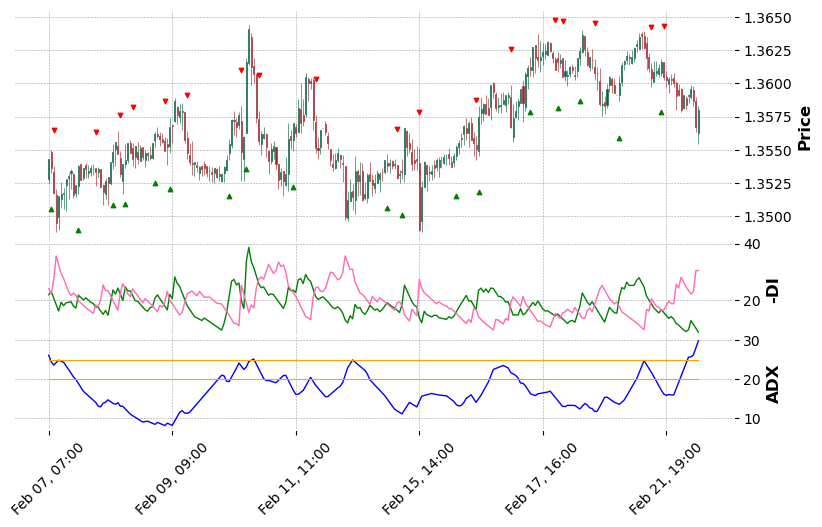

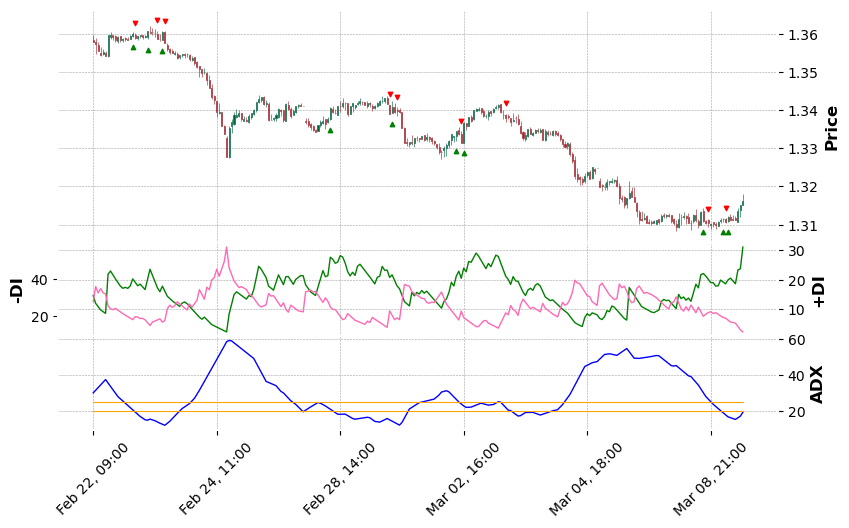

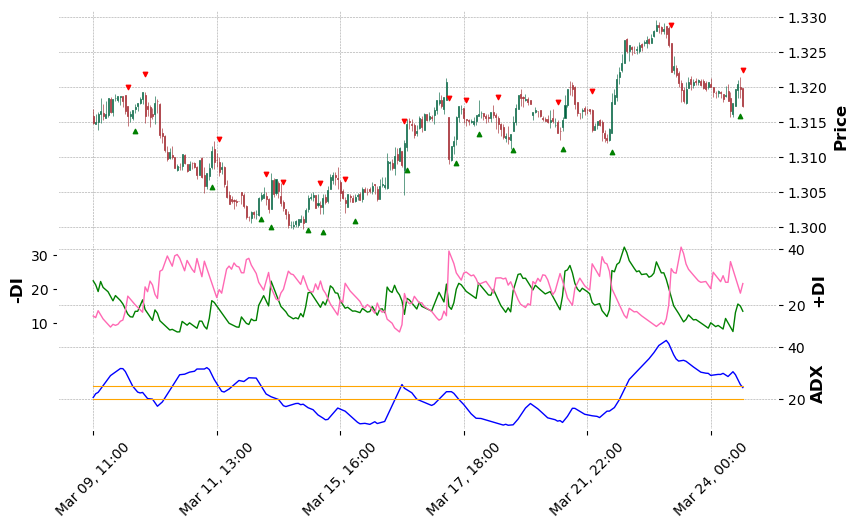

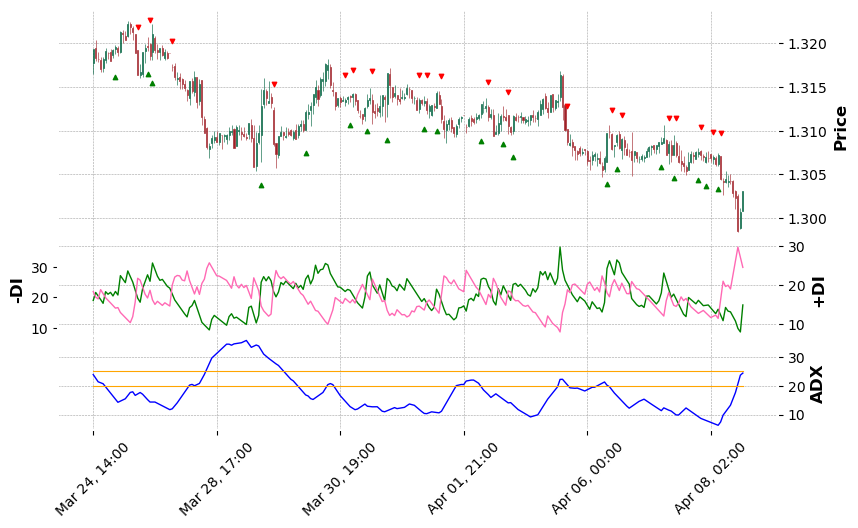

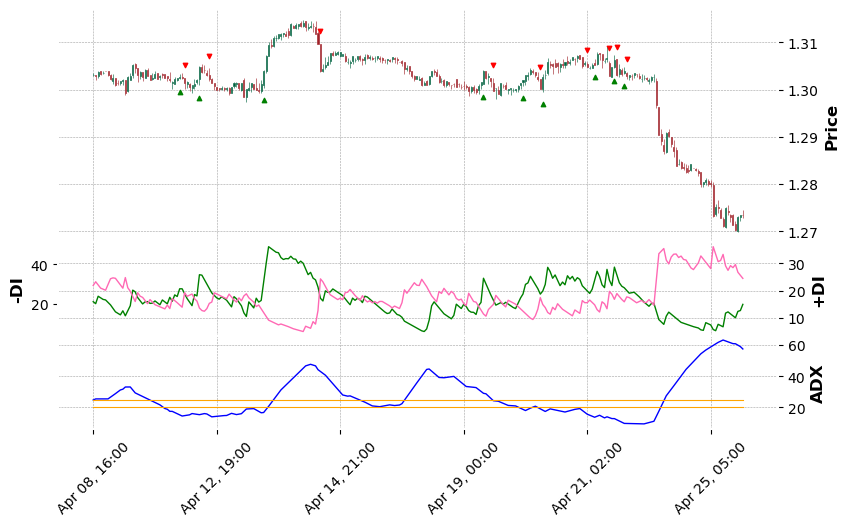

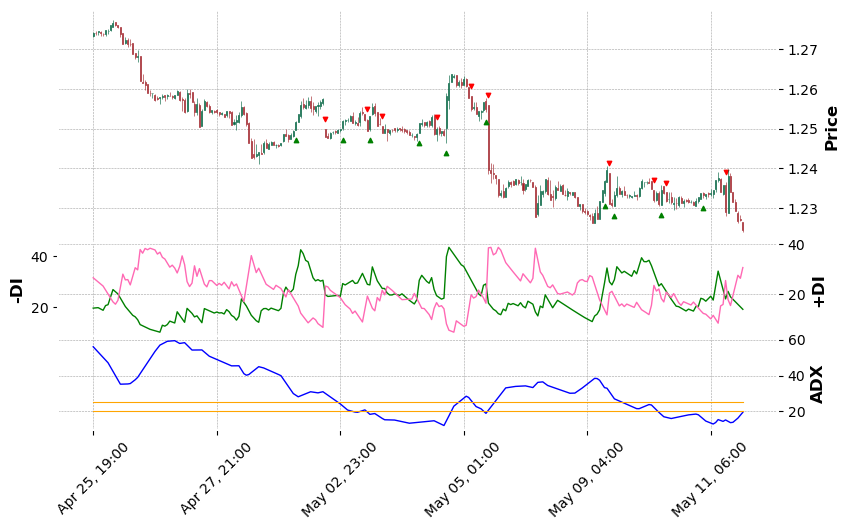

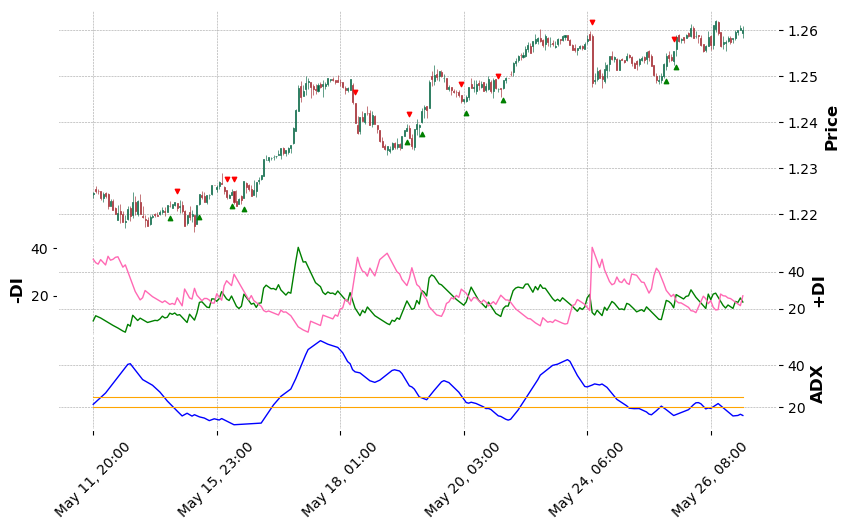

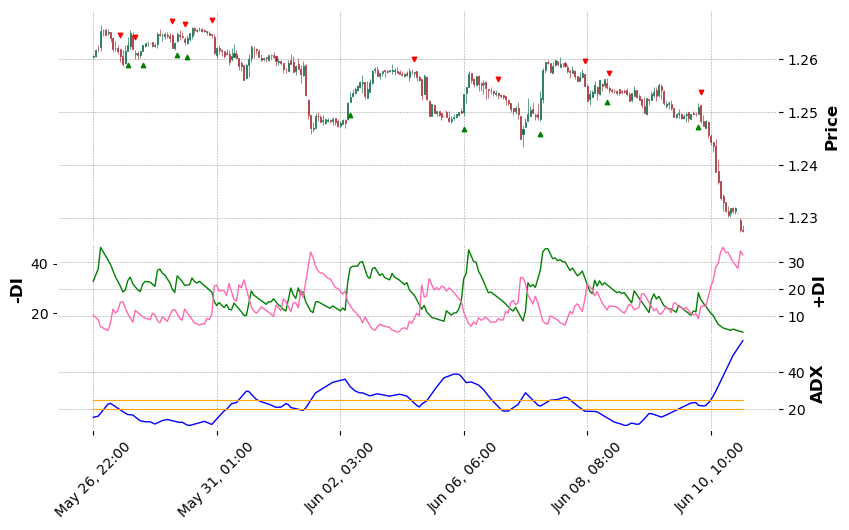

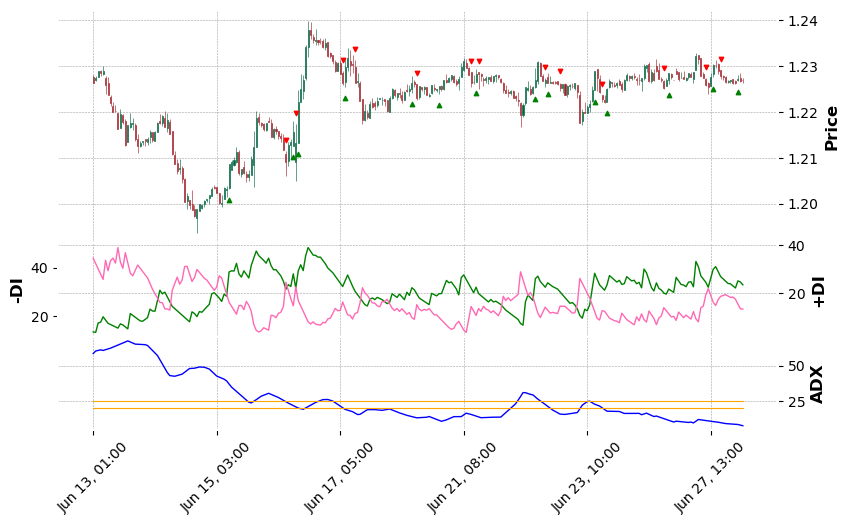

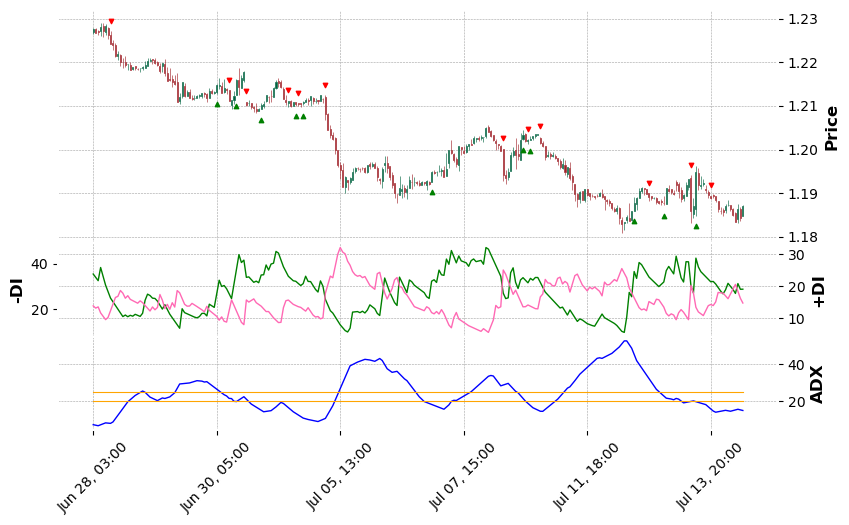

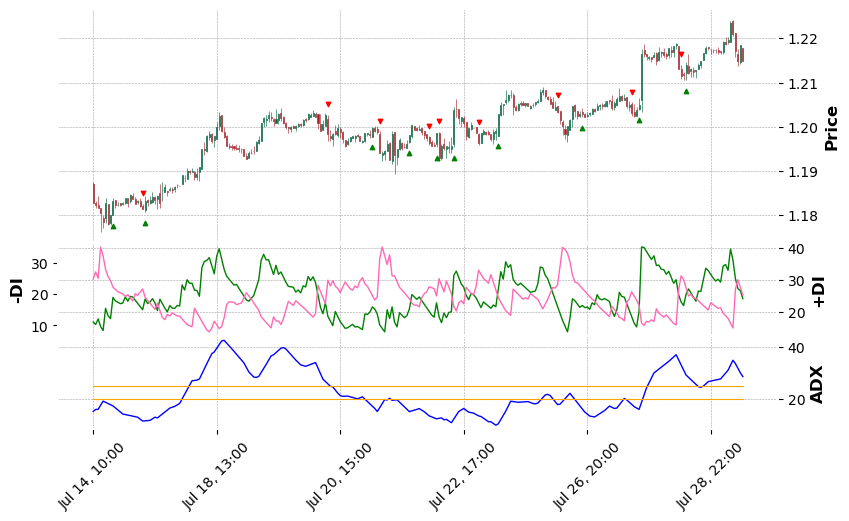

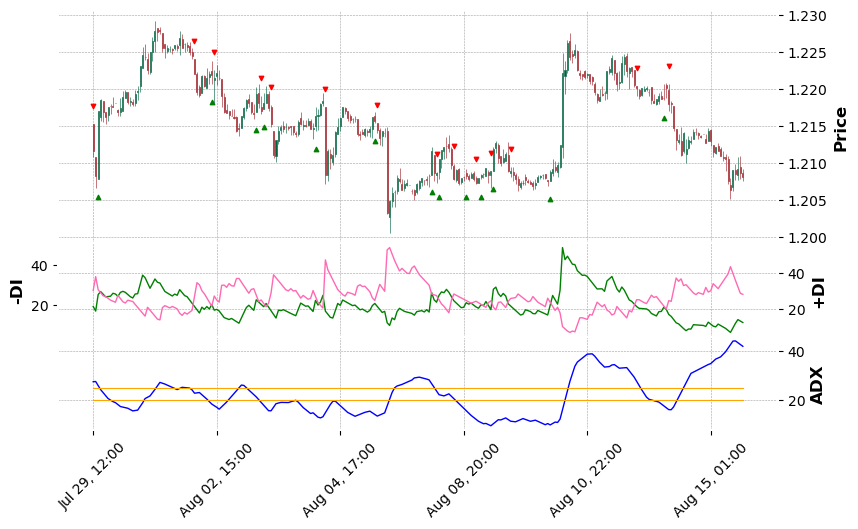

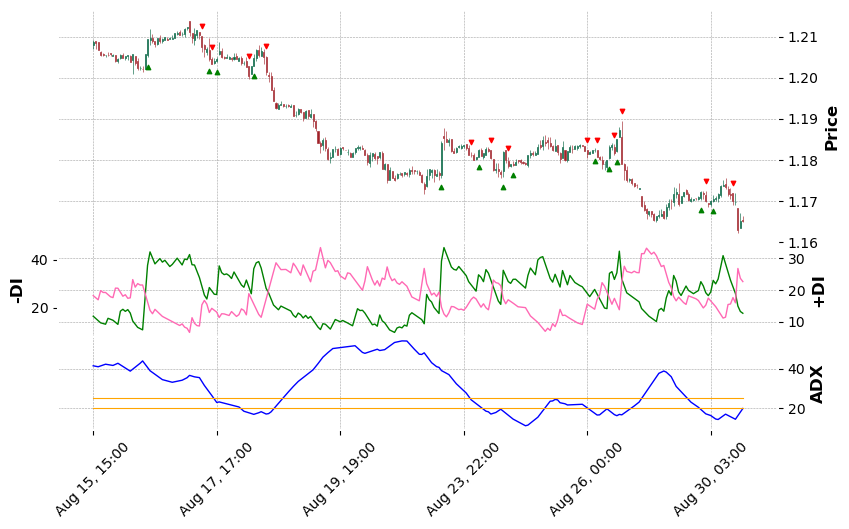

In [52]:
df[df['DMN_cross'] == True]
df_windows = np.linspace( 0, len(df), 20 )

for i in range(len(df_windows) - 1):
    start, end = int(df_windows[i]), int(df_windows[i+1])
    adx_info_plots = adx_plot(df, start, end)

    mpf.plot(df.iloc[start:end], type='candle', style='charles',
         addplot=adx_info_plots,
         figsize=(10, 6))

In [21]:
df[df['ADX_14'] > 25]

,open,high,low,close,adj close,volumn,ADX_14,DMP_14,DMN_14,prev_DMP,prev_DMN,DMP_cross,DMN_cross
timestamp,,,,,,,,,,,,,
2021-11-08 23:00:00,1.356282,1.356502,1.355914,1.356337,1.356337,0,25.306865,29.137096,15.634160,29.913780,16.050907,False,False
2021-11-09 00:00:00,1.356337,1.356760,1.355252,1.355859,1.355859,0,25.029498,27.189789,17.521404,29.137096,15.634160,False,False
2021-11-10 13:00:00,1.350822,1.351242,1.348490,1.350785,1.350785,0,25.027286,8.190138,33.701679,9.224958,34.032694,False,False
2021-11-10 14:00:00,1.350676,1.353913,1.350676,1.352338,1.352338,0,25.076053,17.439043,29.508196,8.190138,33.701679,False,False
2021-11-10 15:00:00,1.351826,1.352247,1.346928,1.347546,1.347546,0,26.443227,14.247991,36.784979,17.439043,29.508196,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-29 12:00:00,1.169946,1.173406,1.168880,1.171729,1.171729,0,33.389192,24.556379,24.674173,18.421699,28.451107,False,False
2022-08-29 13:00:00,1.171660,1.173144,1.170713,1.172182,1.172182,0,31.021341,22.805311,22.914706,24.556379,24.674173,False,False
2022-08-29 14:00:00,1.171687,1.174398,1.168880,1.169235,1.169235,0,29.623919,19.419867,24.445743,22.805311,22.914706,False,False


In [22]:
df[df['ADX_14'] < 20]

,open,high,low,close,adj close,volumn,ADX_14,DMP_14,DMN_14,prev_DMP,prev_DMN,DMP_cross,DMN_cross
timestamp,,,,,,,,,,,,,
2021-11-08 00:00:00,1.348963,1.349491,1.348309,1.348309,1.348309,0,19.155614,24.068928,24.980064,26.354542,17.856083,False,True
2021-11-08 01:00:00,1.348309,1.348800,1.347255,1.347346,1.347346,0,18.368377,22.364799,28.041022,24.068928,24.980064,False,False
2021-11-08 02:00:00,1.347436,1.347927,1.347255,1.347782,1.347782,0,17.679140,21.646784,27.140773,22.364799,28.041022,False,False
2021-11-08 03:00:00,1.348163,1.348690,1.347909,1.347963,1.347963,0,16.288220,24.432752,25.928325,21.646784,27.140773,False,False
2021-11-08 04:00:00,1.348036,1.348181,1.347364,1.348054,1.348054,0,15.543092,23.419277,27.617556,24.432752,25.928325,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-30 12:00:00,1.171921,1.172044,1.169098,1.170029,1.170029,0,14.885273,20.813032,24.268973,23.079017,21.600817,False,True
2022-08-30 13:00:00,1.169892,1.171921,1.169180,1.169905,1.169905,0,14.369603,18.949262,22.095730,20.813032,24.268973,False,False
2022-08-30 14:00:00,1.168484,1.168484,1.162372,1.162926,1.162926,0,16.321748,14.978273,36.404836,18.949262,22.095730,False,False


In [62]:
def find_peak(price, i, order):
    
    max_idx = list(argrelextrema(price.values[:i], np.greater, order=order)[0])
    min_idx = list(argrelextrema(price.values[:i], np.less, order=order)[0])
    
    idx = max_idx + min_idx + [len(price.values[:i]) - 1]
    idx.sort()
    current_idx = idx[-6:]
    
    start = min(current_idx)
    end = max(current_idx)
    
    current_pat = price.values[current_idx]
    
    return current_pat, current_idx, start, end

In [63]:
price = df['close'].copy()
for i in range(100, 120):
    
    current_pat, current_idx, start, end = find_peak(price, i, 10)
        
    plt.plot(np.arange(start, i+15), price.values[start:i+15])
    plt.plot(current_idx, current_pat, c='r')
    plt.show()

NameError: name 'argrelextrema' is not defined